In a grayscale image, pixel values typically fall within different ranges depending on the bit depth of the image:

- **8-bit grayscale (most common):** Pixel values range from **0 to 255**, where:
  - `0` represents **black** (no intensity)
  - `255` represents **white** (full intensity)
  - Values in between represent varying shades of gray

- **16-bit grayscale:** Pixel values range from **0 to 65,535** (used in high-precision imaging like medical or scientific images).

- **Floating-point grayscale images:** Some image formats use floating-point values, where pixel intensities typically range from **0.0 to 1.0**, especially in deep learning and OpenCV processing.

In [1]:
# disable Jedi for better autocomplete
%config Completer.use_jedi = False

# you can make it permanent by adding the following line to your Jupyter config file
# ~/.jupyter/jupyter_notebook_config.py
# c.Completer.use_jedi = False

In [2]:
#Importing important libraries

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Converting images from RGB to grayscale

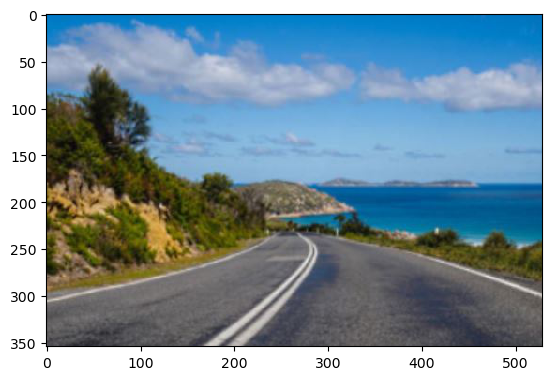

In [3]:
# Checking image using mathplot lib
# Matplotlib (mpimg.imread()) loads images in RGB by default.
# OpenCV (cv2.imread()) loads images in BGR by default.
image_color = mpimg.imread('image.jpg')
plt.imshow(image_color)

In [4]:
#Shape of image
image_color.shape

(354, 529, 3)

uint8 5 226


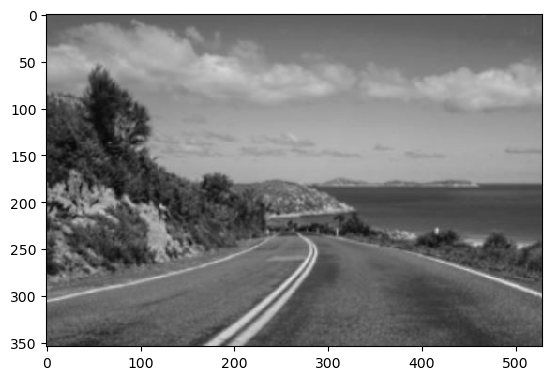

In [5]:
#Converting image into grayscale using openCV, image_color is RGB image, therefore cv2.COLOR_RGB2GRAY option was chosen.
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
print(image_gray.dtype, image_gray.min(), image_gray.max())

plt.imshow(image_gray, cmap='gray', vmin=0, vmax=255)  # Fix auto-normalization issue; Matplotlib automatically normalizes grayscale images (if values are not in [0,1]), which can result in incorrect contrast. 
                                                       # Setting vmin=0, vmax=255 ensures the correct intensity range for 8-bit grayscale images.

In [6]:
#Shape of image
image_gray.shape

(354, 529)

# Road-marking detection with grayscale image

In [7]:
#Creating copy of image
image_copy = np.copy(image_gray)

In [8]:
print(image_copy.dtype, image_copy.min(), image_copy.max())

uint8 5 226


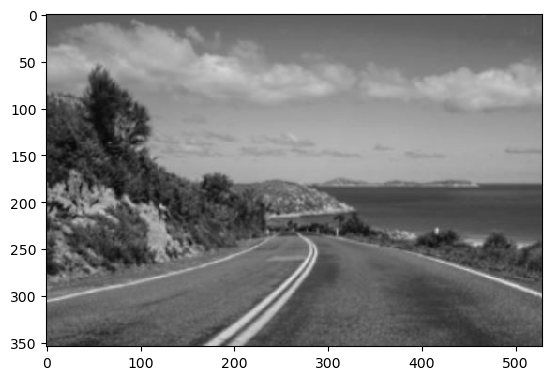

In [9]:
plt.imshow(image_copy, cmap = 'gray', vmin=0, vmax=255)

In [10]:
image_copy.shape

(354, 529)

In [11]:
# Filtering by Any value which is not white
image_copy[ (image_copy[:,:] < 195) ] = 0

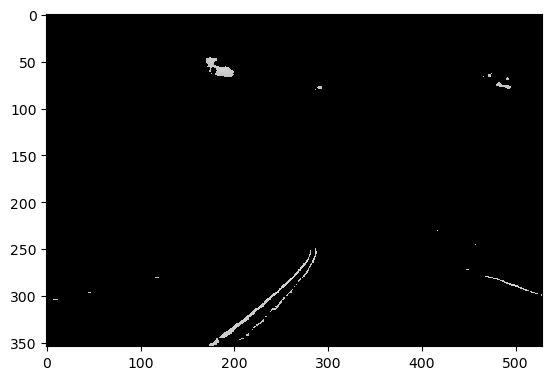

In [12]:
plt.imshow(image_copy, cmap = 'gray', vmin=0, vmax=255)
plt.show()

# Road-marking or lane line detection with RGB image

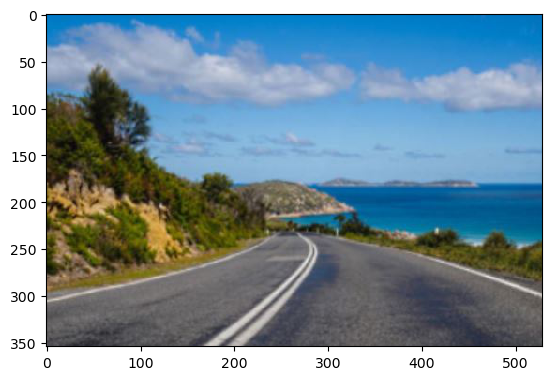

In [13]:
plt.imshow(image_color)

In [14]:
image_copy = np.copy(image_color)
print(image_copy.dtype, image_copy.min(), image_copy.max())

uint8 0 235


In [15]:
# Any value that is not white
image_copy[ (image_copy[:,:,0] < 195) | (image_copy[:,:,1] < 195) | (image_copy[:,:,2] < 195) ] = 0

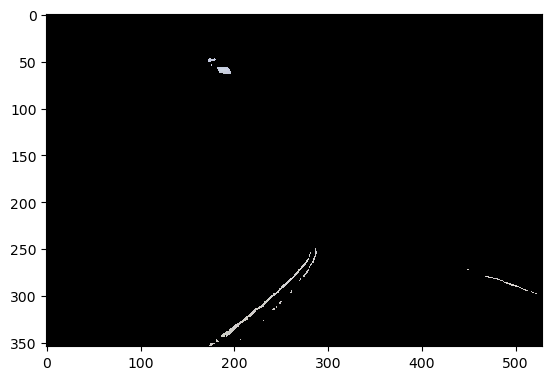

In [16]:
plt.imshow(image_copy, cmap = 'gray', vmin=0, vmax=255)
plt.show()

#### There are a few challenges that might arise when using the techniques above. What if the road markings aren't white? What if it is night time or the weather is different?

# Color Space manipulation

In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [18]:
image = cv2.imread('test_image.jpg') # image which is read is in BGR format which is the default format of OpenCV

In [19]:
image.shape

(889, 1344, 3)

In [20]:
print ('Height = ', int(image.shape[0]), 'pixels')
print ('Width = ', int(image.shape[1]), 'pixels')

Height =  889 pixels
Width =  1344 pixels


In [21]:
#Checking image using openCV
cv2.startWindowThread()
cv2.imshow('Self Driving Car!', image) # OpenCV's cv2.imshow() assumes the image is in BGR or Grayscale.
cv2.waitKey(0)
cv2.destroyAllWindows()

(889, 1344, 3)

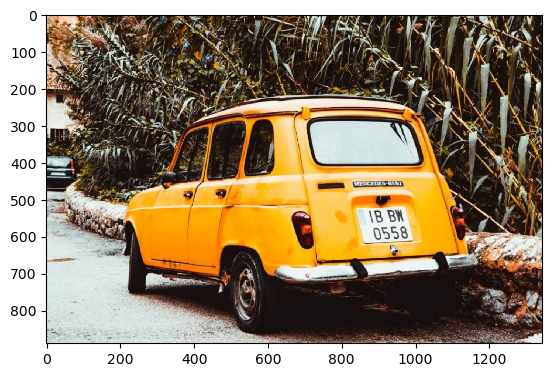

In [22]:
#Checking the image using openCV
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img) # matplotlib expects the image to be in RGB to show
rgb_img.shape

In [23]:
#Grayscale image
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Self Driving Car in Grayscale!', gray_img) # OpenCV's cv2.imshow() assumes the image is in BGR or Grayscale.
cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
gray_img.shape

(889, 1344)

In [25]:
#BGR to HSV using openCV
image = cv2.imread('test_image.jpg')
cv2.imshow('Self Driving Car!', image) # OpenCV's cv2.imshow() by default assumes the image is in BGR or Grayscale.
cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
# convert to hsv
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

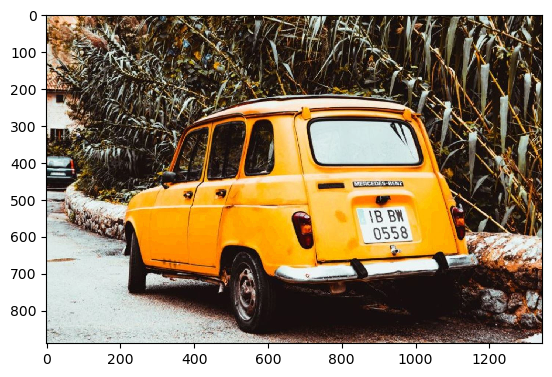

In [27]:
# Matplotlib expects an RGB image, so you must convert HSV to RGB before using plt.imshow()
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))

In [28]:
# cv2.startWindowThread()
cv2.imshow('HSV Image - Strange because of misinterpreatation', hsv_image) # OpenCV's cv2.imshow() assumes the image is in BGR or Grayscale. If you pass an HSV image directly, OpenCV will misinterpret the pixel values and display strange colors.
cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
hsv_image.shape

(889, 1344, 3)

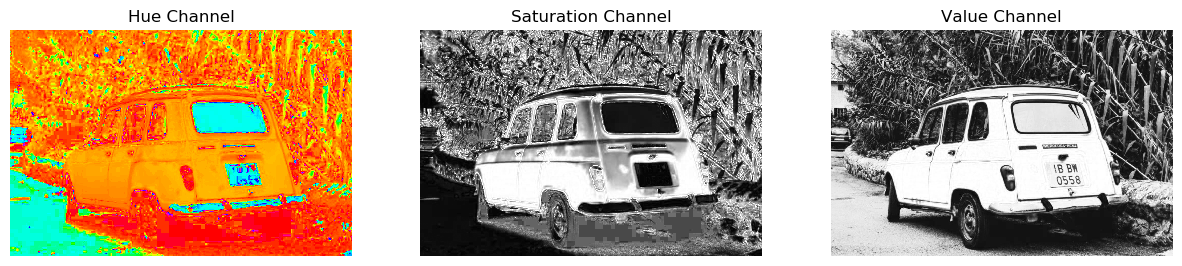

In [30]:
# The solution: Since HSV has three channels (H, S, V), you can visualize them separately:
h, s, v = cv2.split(hsv_image)

# Plot each channel
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(h, cmap='hsv')  # Hue channel; cmap="hsv" is for single-channel grayscale-like data and can help to display hue channel
ax[0].set_title("Hue Channel")
ax[1].imshow(s, cmap='gray')  # Saturation channel
ax[1].set_title("Saturation Channel")
ax[2].imshow(v, cmap='gray')  # Value channel
ax[2].set_title("Value Channel")

for a in ax:
    a.axis('off')

plt.show()

Text(0.5, 1.0, 'Hue channel')

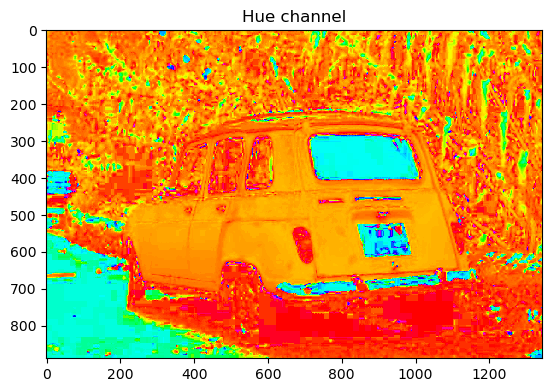

In [31]:
#HUE Channel
plt.imshow(hsv_image[:, :, 0], cmap='hsv') # h-s-v, h is at index 0, s is at the index 1, and v is at the index 2; cmap="hsv" is for single-channel grayscale-like data and can help to display hue channel
plt.title('Hue channel')

Text(0.5, 1.0, 'Saturation channel')

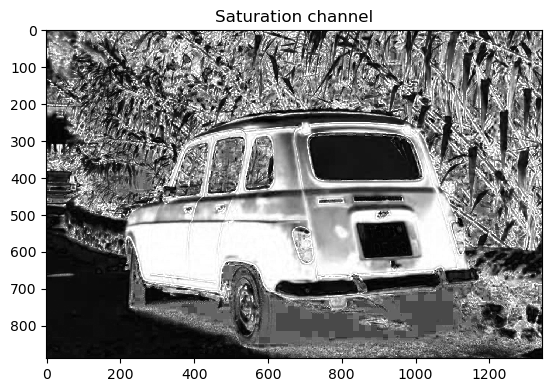

In [32]:
#Saturation Channel
plt.imshow(hsv_image[:, :, 1], cmap='gray') # by default, Matplotlib expects images in RGB format, therefore cmap parameter should be provided.
plt.title('Saturation channel')

Text(0.5, 1.0, 'Value channel')

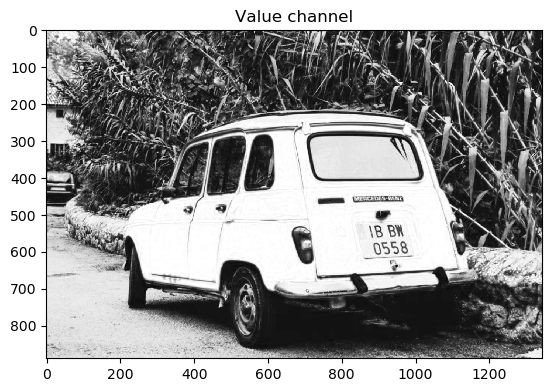

In [33]:
#Value Channel
plt.imshow(hsv_image[:, :, 2], cmap='gray') # by default, Matplotlib expects images in RGB format, therefore cmap parameter should be provided.
plt.title('Value channel')

In [34]:
#Split and merge the channels
image = cv2.imread('test_image.jpg')
B, G, R = cv2.split(image)
B.shape

(889, 1344)

In [35]:
G.shape

(889, 1344)

In [36]:
#Checking B channel
cv2.imshow("Blue Channel!", B) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
image.shape[:2]

(889, 1344)

In [38]:
# we are going to create the channel with all zeros
zeros = np.zeros(image.shape[:2], dtype = "uint8")
# display(zeros.shape)
# display(cv2.merge([B, zeros, zeros]).shape)

cv2.imshow("Blue Channel!", cv2.merge([B, zeros, zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
#Merge the channels
image_merged = cv2.merge([B, G, R])      
cv2.imshow("Merged Image!", image_merged) 

cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
#Adding channel with more green
image_merged = cv2.merge([B, G+100, R]) 
cv2.imshow("Merged Image with some added green!", image_merged) 

cv2.waitKey(0)
cv2.destroyAllWindows()

# Sharpening and blurring

#### We can use different types of kernels for sharpening and blurring images. The kernel for sharpening (the sharpen kernel) highlights the differences in adjacent pixel values, which emphasizes detail by enhancing contrast.

In [41]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [42]:
image = cv2.imread('test_image.jpg')
cv2.imshow('My Image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [43]:
#Converting into Grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Self Driving Car in Gray!', gray_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [44]:
#Defining Kernal
Sharp_Kernel_1 = np.array([[0,-1,0], 
                        [-1,5,-1], 
                        [0,-1,0]])

#Applying Kernal
# In the function cv2.filter2D(src, ddepth, kernel), the second parameter ddepth specifies the desired depth of the output image. -1 means that output image has the same depth (data type) as the input.
Sharpened_Image_1 = cv2.filter2D(gray_img, -1, Sharp_Kernel_1)

In [45]:
cv2.imshow('Sharpened Image', Sharpened_Image_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
#Sharpening Kernal 2
Sharp_Kernel_2 = np.array([[-1,-1,-1], 
                        [-1,9,-1], 
                        [-1,-1,-1]])

In [47]:
Sharpened_Image_2 = cv2.filter2D(gray_img, -1, Sharp_Kernel_2)

In [48]:
cv2.imshow('Sharpened Image_2', Sharpened_Image_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
#Blurring Kernel

Blurr_Kernel = np.ones((3,3))
Blurr_Kernel

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [50]:
Blurred_Image = cv2.filter2D(gray_img, -1, Blurr_Kernel)
cv2.imshow('Blurred Image', Blurred_Image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
# Blurring Kernel normalized 
Blurr_Kernel = np.ones((3,3)) * 1/9
Blurr_Kernel

Blurred_Image = cv2.filter2D(gray_img, -1, Blurr_Kernel)
cv2.imshow('Blurred Image', Blurred_Image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
# now try blurring with a more powerful kernel 
# the choice of the kernel should not always have to be the square matrix and elements of the kernel matrix need not necessarily be predetermined. 
# usually, we use a matrix of any dimension.
# the selection of the filter matrix also depends on the type of images that we are applying convolution operations to in order to extract features.
Blurr_Kernel = np.ones((8,8))
Blurr_Kernel

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [53]:
#blurr kernal; normalized
Blurr_Kernel = np.ones((8,8)) * 1/64
Blurr_Kernel

array([[0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625],
       [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
        0.015625, 0.015625]])

In [54]:
#Checking the blurred image 
Blurred_Image = cv2.filter2D(gray_img, -1, Blurr_Kernel)

cv2.imshow('Blurred Image', Blurred_Image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
# Gaussian blur 3 x 3 (approximation)
Blurr_Kernel = np.array([[1, 2, 1], 
                        [2, 4, 2], 
                        [1, 2, 1]])

# normalize the kernel
Blurr_Kernel = Blurr_Kernel * 1/16

In [56]:
#Checking the blurred image 
Blurred_Image = cv2.filter2D(gray_img, -1, Blurr_Kernel)

cv2.imshow('Blurred Image', Blurred_Image)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Sobel, Laplacian and Canny edge detection

In [57]:
# Edge detection is a computer vision feature-extraction technique that is used to detect the sharp changes in an image.
# Let's say we have three consecutive pixels; 255 (white), 0 (black), 255 (white). So this means that we are going from white to black and then back to white
# Edge detection happens when pixels change from 255 to 0 and from 0 to 255, as shown in the following screenshot.

In [58]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [59]:
image = cv2.imread('test_image.jpg')

cv2.imshow('My Test Image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [60]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Self Driving Car in Gray!', gray_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
#Sobel X
x_sobel = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize = 7) # cv2.Sobel(src, ddepth, dx, dy, ksize) is applying the Sobel operator to detect edges in the y-direction (vertical edges); ddepth - Desired output depth (cv2.CV_64F for high precision); 
                                                           # dx - Order of derivative in x (0 means no derivative in x); dy - Order of derivative in y (1 means first derivative in y); ksize - Size of the Sobel kernel (odd number, e.g., 3, 5, 7);
cv2.imshow('Sobel - X direction', x_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [62]:
#Sobel Y
y_sobel = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize = 7)
cv2.imshow('Sobel - Y direction', y_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [63]:
#Laplacian
laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey()
cv2.destroyAllWindows()


In [64]:
#Canny Edge detection 

threshold_1 = 120
threshold_2 = 200

canny = cv2.Canny(gray_img, threshold_1, threshold_2)

cv2.imshow('Canny', canny)
cv2.waitKey()
cv2.destroyAllWindows()

#### Canny edge detection is the best method for edge detection, as it has numerous computer-vision applications. It also plays an important role in the field of autonomous cars. 

# Image tranformation techniques (rotation, translation, resizing, masking a region of interest)
- image transformations are used to correct distorted images or to change the perspective of an image.
- with regard to self-driving cars, there are lots of applications of image transformation.
- we have different cameras mounted in the car, and most of the time they are required to transform the image. 
- sometimes, by transforming the image, we allow the car to concentrate on an area of interest.

There are **two main types** of geometric image transformations:  

### **1️⃣ Linear Transformations**
   - **Affine Transformation**  
   - **Projective Transformation** (also called Homography or Perspective Transformation)

### **2️⃣ Non-Linear Transformations**  
   - Includes deformations like warping, fisheye, and elastic transformations.

---

### **🔹 1️⃣ Affine Transformation**
✅ **Preserves straight lines & parallelism** but **not angles or lengths**.  
✅ **Examples:** Rotation, Scaling, Translation, Shearing.  
✅ **Transformation Matrix:**  

   $$
   A = 
   \begin{bmatrix}
   a_{11} & a_{12} & t_x \\
   a_{21} & a_{22} & t_y \\
   0 & 0 & 1
   \end{bmatrix}
   $$
   
- **Parallel lines remain parallel**.
- **Example Code (OpenCV)**:
  ```python
  M = np.float32([[1, 0.5, 50], [0.5, 1, 30]])  # Shear + Translation
  transformed_img = cv2.warpAffine(img, M, (cols, rows))
  ```
  
---

### **🔹 2️⃣ Projective (Perspective) Transformation**
✅ **Preserves straight lines** but **not parallelism**.  
✅ **Used in Perspective Changes (e.g., viewing an image from an angle)**.  
✅ **Transformation Matrix:**

   $$
   P = 
   \begin{bmatrix}
   p_{11} & p_{12} & p_{13} \\
   p_{21} & p_{22} & p_{23} \\
   p_{31} & p_{32} & 1
   \end{bmatrix}
   $$
   
- **Can transform rectangles into trapezoids.**
- **Example Code (OpenCV)**:
  ```python
  M = cv2.getPerspectiveTransform(src_points, dst_points)
  transformed_img = cv2.warpPerspective(img, M, (cols, rows))
  ```

🔹 **"Projective" and "Perspective" mean the same thing in OpenCV!**  

---

### **🔹 3️⃣ Non-Linear Transformations (Warping)**
✅ **Can bend and distort an image in complex ways**.  
✅ Examples:
   - **Fisheye effect**
   - **Elastic distortions**
   - **Curvilinear warps**
✅ **Common in deep learning augmentations (e.g., TensorFlow, Albumentations).**

---

### **Summary**
| Transformation | Preserves Parallel Lines? | Preserves Angles & Lengths? | Examples |
|---------------|----------------|----------------------|----------|
| **Affine** | ✅ Yes | ❌ No | Rotation, Scaling, Shearing |
| **Projective (Perspective)** | ❌ No | ❌ No | Camera perspective changes |
| **Non-Linear (Warping)** | ❌ No | ❌ No | Fisheye, Elastic Deformations |


## Image rotation

We will perform a rotation by using OpenCV and the rotation matrix `M`. A rotation matrix is a matrix that is used to perform a rotation in Euclidean space.
It rotates points in the `xy` plane counterclockwise through an angle, `theta`, around the origin.

In [65]:
#Important libraries

import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

In [66]:
# Checking test image
image = cv2.imread('test_image2.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [67]:
height, width = image.shape[:2] 

In [68]:
height

464

In [69]:
width

664

In [70]:
# Rotate around the center
M_rotation = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5) # getRotationMatrix2D(center, angle, scale);

# @param center Center of the rotation in the source image.
# @param angle Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
# @param scale Isotropic scale factor. Scaling factor (1.0 = same size, 0.5 = half size).

#### When you rotate an image counterclockwise about its center, think of a clock's hands moving backward while keeping the pivot in place. (assume pivot is the center of image, clock's hand pointing to top-left corner-coordinate origin, you rotate it 90 degrees backward)

In [71]:
# insert size of the output image
rotated_image = cv2.warpAffine(image, M_rotation, (width, height)) # (width, height) - Keeps the same output size.

In [72]:
# Rotated image
cv2.imshow('Rotated', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Visualize the rotation
Before Rotation
```
(0,0)     → (width,0)
+---------+
|         | 
|   IMG   | 
|         |
+---------+
(0,height) → (width,height)
```

After 90° Counterclockwise Rotation
```
(width,0)  → (width,height)
+---------+
|         | 
|   IMG   | 
|         |
+---------+
(0,0)      → (0,width)
```

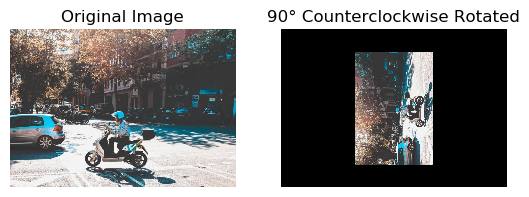

In [73]:
# Show images
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("90° Counterclockwise Rotated")
plt.axis("off")

plt.show()

## Image Translation

Image translation involves shifting an object's position in the `x` and/or `y` direction. OpenCV uses a translation matrix, `T`, as follows:

$$
   T = 
   \begin{bmatrix}
   0 & 1 & T_x \\
   1 & 0 & T_y \\
   \end{bmatrix}
   $$



In [74]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

In [75]:
image = cv2.imread('test_image3.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [76]:
 height, width = image.shape[:2] 

In [77]:
height

511

In [78]:
width

781

In [79]:
Translational_Matrix = np.float32([[1, 0, 120], 
                                   [0, 1, -150]]) # 1, 0 and 0, 1 → Identity elements (no scaling or rotation); 120 → Moves the image 120 pixels to the right (positive x-direction); -150 → Moves the image 150 pixels up (negative y-direction).

In [80]:
translated_image = cv2.warpAffine(image, Translational_Matrix, (width, height))

In [81]:
#Translated Image
cv2.imshow('Translated Image', translated_image)
cv2.waitKey()
cv2.destroyAllWindows()

## Image Resizing

Resizing using OpenCV can be performed by using `cv2.resize()` function. The preffered interpolation methods are `cv.INTER_AREA` for shrinking and `cv.INTER_CUBIC` for zooming. By default, the interpolation method used is `cv.INTER_LINEAR` for all resizing purposes.

In [82]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
image = cv2.imread('test_image3.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()
cv2.destroyAllWindows()


In [84]:
height, width = image.shape[:2] 

In [85]:
height

511

In [86]:
width

781

In [87]:
resized_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC) # Try 0.5; Resizes the image by scaling it down to 50% of its original size using cubic interpolation.

# cv2.resize(src, dsize, fx, fy, interpolation)
# fx=0.5 → Image width is scaled down to 50%.
# fy=0.5 → Image height is scaled down to 50%.
# dsize=None → The function calculates the new size automatically using fx and fy.
# cv2.INTER_CUBIC → Uses bicubic interpolation, which provides smooth scaling (better quality than nearest-neighbor or bilinear).

In [88]:
cv2.imshow('Resized Image', resized_image) 
cv2.waitKey()
cv2.destroyAllWindows()

## Perspective Transformation

Perspective transformation is an important aspect of programming self-driving cars. Perspective transformation is more complicated than affine transformation.
In perspective transformation, we use e.g. a 3x3 transformation matrix to transform images from the 3D world into 2D images.

An example of perspective transformation is given in the image. We can see the tilted chessboard, and once the perspective transform is applied, the board is transformed into a normal chessboard with a top-down view. 
This has numerous applications in the field of self-driving cars, as roads have many objects that require perspective transformation to be processed.

![chessboard](chessboard.png)

In [89]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

In [90]:
image = cv2.imread('Speed_Sign_View_2.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [91]:
height, width = image.shape[:2]

In [92]:
height

423

In [93]:
width

640

Implement perspective transformation to a traffic signboard using openCV library

In [94]:
Source_points = np.float32([[420,70], [580, 50], [590,210], [430, 220] ]) # position of a signboard in the iamge; top-left, top-right, bottom-right, bottom-left

In [95]:
Destination_points = np.float32([[0,0], [width,0], [width,height], [0,height]]) # transformed coorddinates; top-left, top-right, bottom-right, bottom-left

In [96]:
M = cv2.getPerspectiveTransform(Source_points, Destination_points)

In [97]:
warped = cv2.warpPerspective(image, M, (width, height))


In [98]:
cv2.imshow('warped Image', warped)
cv2.waitKey()
cv2.destroyAllWindows()

# Cropping, dilating, and eroding an image

## Cropping

In [99]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

In [100]:
image = cv2.imread('test_image4.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [101]:
height, width = image.shape[:2]

In [102]:
height

334

In [103]:
width

498

In [104]:
# the top-left coordintaes of the desired cropped area are w0 and h0:
w0 = int(width * 0.5)
h0 = int(height * 0.5) 

In [105]:
# the bottom-right coordinates of the desired cropped area w1 and h1:
h1 = int(height * 1)
w1 = int(width * 1)

In [106]:
Image_cropped = image[h0:h1 , w0:w1]

In [107]:
cv2.imshow("Cropped Image", Image_cropped) 
cv2.waitKey() 
cv2.destroyAllWindows()

## Erosion, Input, Dilation

`Erosion` means the removal of pixels at the boundaries of the objects.
`Dilation` means the addition of extra pixels to the boundaries of the objects in an image.

In [108]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

In [109]:
image = cv2.imread('Speed_Sign_View_2.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [110]:
# Creates a 3×3 kernel filled with ones.
# Used to scan over the image for morphological operations.
kernel = np.ones((3,3), np.uint8)

# Performs morphological operations:
# - Erosion (cv2.erode) shrinks bright regions (removes noise, reduces object size).
# - Dilation (cv2.dilate) expands bright regions (fills holes, increases object size)
image_erosion = cv2.erode(image, kernel, iterations=3) 
image_dilation = cv2.dilate(image, kernel, iterations=3)

In [111]:
cv2.imshow('Input', image)
cv2.imshow('Erosion', image_erosion)
cv2.imshow('Dilation', image_dilation)
cv2.waitKey()
cv2.destroyAllWindows()

Combining Erosion and Dilation:
- Erosion first, then dilation → Called Opening (cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel))
        - ✔ Removes small noise without affecting object size.
- Dilation first, then erosion → Called Closing (cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel))
        - ✔ Fills small holes without affecting object size.

## Masking regions of interest

The main goal of masking regions of interest is to color filter an image to perform different operations. For instance, when an autonomous car is driving on the road, the region of interest for the car is the lane lines because it must be driven on the road.

In [112]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

In [113]:
image_color = cv2.imread('test5.jpg')
cv2.imshow('Original Image', image_color)
cv2.waitKey()
cv2.destroyAllWindows()

In [114]:
height, width = image_color.shape[:2]

In [115]:
height

426

In [116]:
width

640

In [117]:
# Converting image in grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

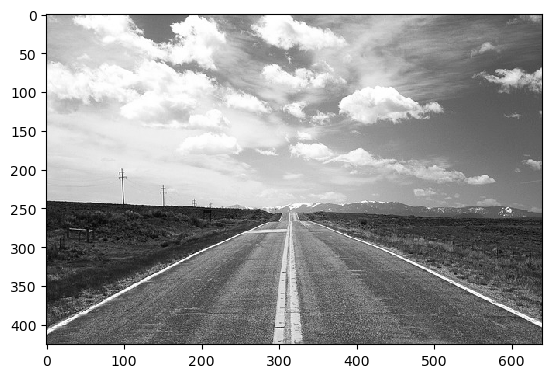

In [118]:
plt.imshow(image_gray, cmap = 'gray')

In [119]:
#Point of interest in the image
ROI = np.array([[(0, 400),(300, 250), (450, 300), (700, height)]], dtype=np.int32)

In [120]:
#Define blank image with all zeros (black)
blank = np.zeros_like(image_gray)

In [121]:
blank.shape

(426, 640)

In [122]:
#Filling mask of interest in white (255)
mask = cv2.fillPoly(blank, ROI, 255)

In [123]:
#Perform a bit-wise AND operation to select only the region of interest
masked_image = cv2.bitwise_and(image_gray, mask)

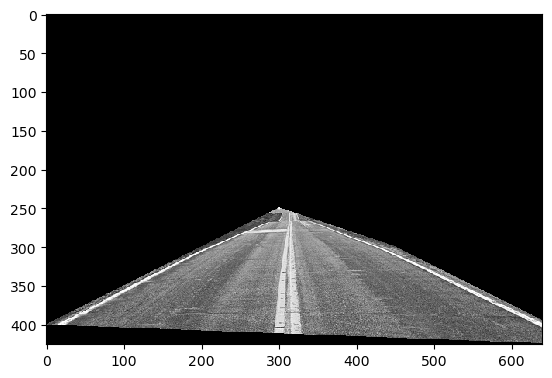

In [124]:
#Masked Image
plt.imshow(masked_image, cmap = 'gray')

### Hough transform

The hough transform is one of the most important topics of computer vision. It is used in feature extraction and image analysis. 
The hough transform was invented in 1972 by Richard Duda and Peter Heart, and it was originally called the `generalized Hough transform`. 
In general, the technique is used to find instances of objects that are not perfectly within a certain class by means of a voting procedure.

It is possible to use Hough transform along with the region of interest masking.
We know that the equation of a straight line is `y=mx+c`. The straight line has two parameters, `m` and `c`, and we can plot it as a function of `x` and `y`. We can also represent these lines in a parametric space, which we call the Hough space. 

In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [126]:
image_c = cv2.imread('calendar.jpg')
cv2.imshow('Given Image', image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()

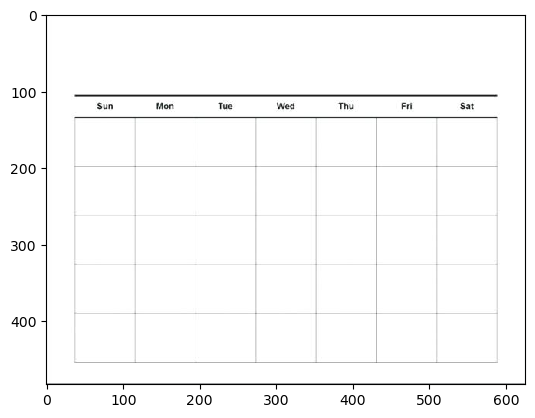

In [127]:
plt.imshow(cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB))

In [128]:
# Edge detection works best on grayscale images because color information is not needed.
image_g = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)

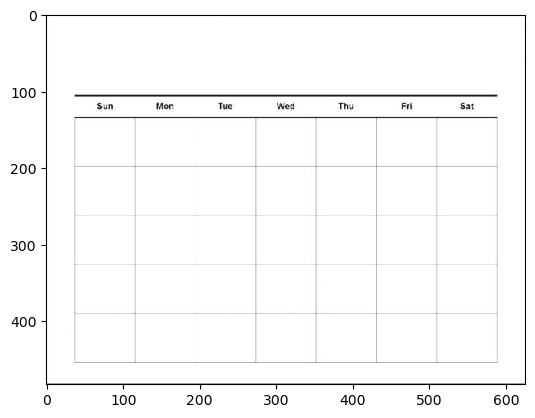

In [129]:
plt.imshow(image_g, cmap='gray')

In [130]:
image_canny = cv2.Canny(image_g, 50, 200, apertureSize= 3) # cv2.Canny(image, threshold1, threshold2, apertureSize); image_g - Input grayscale image; 50 - Lower threshold (edges weaker than this are discarded);
                                                           # 200 - Upper threshold (edges stronger than this are kept); apertureSize=3 - Size of Sobel kernel (default = 3) - Uses a 3×3 Sobel kernel

How Canny Edge Detection Works:
- Noise Reduction: Uses a Gaussian filter to smooth the image.
- Gradient Calculation: Computes intensity gradients using Sobel operators.
- Non-Maximum Suppression: Thin out edges to remove unwanted pixels.
- Hysteresis Thresholding:
    - Edges above threshold2 (200) are strong edges (kept).
    - Edges below threshold1 (50) are discarded.
    - Edges between 50-200 are kept only if connected to a strong edge.

In [131]:
image_canny

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0, 255,   0],
       ...,
       [255,   0,   0, ...,   0, 255,   0],
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [132]:
cv2.imshow('canny image', image_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [133]:
#Applying Hough transform
lines = cv2.HoughLines(image_canny, 1, np.pi/180, 250)

In [134]:
 if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            
            x0 = rho * np.cos(theta)
            y0 = rho * np.sin(theta)
            
            a = np.cos(theta)
            b = np.sin(theta)
           
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image_c, (x1, y1), (x2, y2), (255, 0, 0), 2)

In [135]:
cv2.imshow('Hough Lines', image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [136]:
# in the shown image the by the last cell above, all the lines in blue have been detected by the Hough transform.